In [1]:
%matplotlib inline
import warnings
warnings. filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import tree

C:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



# [0] <font color='red'>Load Data

In [2]:
from scipy.sparse import load_npz

path = "C:/Python/Assignments/Preprocessing/"

def opn(name):
    with open(path + name , "rb") as file:
        return pickle.load(file)

train_bow = load_npz(path + "train_bow.npz")
test_bow = load_npz(path + "test_bow.npz")
cv_bow = load_npz(path + "cv_bow.npz")

train_tfidf = load_npz(path + "train_tfidf.npz")
test_tfidf = load_npz(path + "test_tfidf.npz")
cv_tfidf = load_npz(path + "cv_tfidf.npz")

with open(path +"X_test.txt", "rb") as file:
    X_test = pickle.load(file)
with open(path +"X_train.txt", "rb") as file:
    X_train = pickle.load(file)
with open(path +"X_cv.txt", "rb") as file:
    X_cv = pickle.load(file)
    
with open(path +"Y_test.txt", "rb") as file:
    Y_test = pickle.load(file)
with open(path +"Y_train.txt", "rb") as file:
    Y_train = pickle.load(file)
with open(path +"Y_cv.txt", "rb") as file:
    Y_cv = pickle.load(file)

with open(path + "X_cv_sum.txt", "rb") as file:
    X_cv_sum = pickle.load(file)
with open(path + "X_train_sum.txt", "rb") as file:
    X_train_sum = pickle.load(file)
with open(path + "X_test_sum.txt", "rb") as file:
    X_test_sum = pickle.load(file)

with open(path + "train_avgw2v.txt", "rb") as file:
    train_avgw2v = pickle.load(file)
with open(path + "cv_avgw2v.txt", "rb") as file:
    cv_avgw2v = pickle.load(file)
with open(path + "test_avgw2v.txt", "rb") as file:
    test_avgw2v = pickle.load(file)

with open(path + "train_tfw2v.txt", "rb") as file:
    train_tfw2v = pickle.load(file)
with open(path + "cv_tfw2v.txt", "rb") as file:
    cv_tfw2v = pickle.load(file)
with open(path + "test_tfw2v.txt", "rb") as file:
    test_tfw2v = pickle.load(file)
    

# [5] Assignment 8: Decision Trees

<ol>
    <li><strong>Apply Decision Trees on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 20 important features from both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using `feature_importances_` method of <a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>Decision Tree Classifier</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying Decision Trees

In [3]:
def DT(train,test,cv):
    #depth = [1, 5]
    #sample_split = [5, 10]
    
    depth = [1, 5,10,13,15,17,20]
    sample_split = [5, 10, 100, 500]
    parameter = {'max_depth':depth, 'min_samples_split':sample_split}
    
    dt = tree.DecisionTreeClassifier(class_weight='balanced')
    clf = GridSearchCV(dt,parameter,verbose=1,scoring='roc_auc',n_jobs = -1)
    clf.fit(train,Y_train)
    depth_opt, split_opt = clf.best_params_.get('max_depth'), clf.best_params_.get('min_samples_split')
    
    
    train_score = clf.cv_results_.get('mean_train_score')
    test_score = clf.cv_results_.get('mean_test_score')
    
    x2 = np.arange(len(depth))
    plt.plot(x2,train_score[::4],'r', label = 'Train Data(5)')
    plt.plot(x2,test_score[::4],'r--', label = 'CV Data(5)')

    plt.plot(x2,train_score[1::4],'b', label = 'Train Data(10)')
    plt.plot(x2,test_score[1::4],'b--', label = 'CV Data(10)')

    plt.plot(x2,train_score[2::4],'g', label = 'Train Data(100)')
    plt.plot(x2,test_score[2::4],'g--', label = 'CV Data(100)')

    plt.plot(x2,train_score[3::4],'y', label = 'Train Data(500)')
    plt.plot(x2,test_score[3::4],'y--', label = 'CV Data(500)')

    plt.xticks(x2, depth)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("AUC Values for Train and CV Data with penalty\n")
    plt.xlabel("Hyper Parameter(Depth)")
    plt.ylabel("AUC Value")
    plt.show()

    df_heatmap = pd. DataFrame(train_score. reshape(7, 4), index=depth, columns=sample_split )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=18)
    plt. xlabel('Sample_Split' , size=18)
    plt. title("Train Data", size=24)
    plt. show()

    df_heatmap = pd. DataFrame(test_score. reshape(7, 4), index=depth, columns=sample_split )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=18)
    plt. xlabel('Sample_Split' , size=18)
    plt. title("CV Data", size=24)
    plt. show()

    
    
    
    print("The optimal value of max_depth = ", depth_opt , " And Optimal min_samples_split is : ", split_opt)
    
    dt = tree.DecisionTreeClassifier(class_weight= 'balanced',max_depth=depth_opt, min_samples_split=split_opt)
    dt.fit(train,Y_train)
    
    # Since decision function gives probability values   
    pred = dt.predict_proba(test)[:,1]
    fpr, tpr, threshold = roc_curve(Y_train, dt.predict_proba(train)[:,1] )
    fpr1, tpr1, threshold1 = roc_curve(Y_test, pred )
   
    print("The AUC value for test data is ",roc_auc_score( Y_test, pred))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr1,tpr1,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve for Train and Test Data\n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    #Confusion Matrix
    cm = confusion_matrix(Y_test,dt.predict(test))
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix\n",size=24)
    plt.show()

## [5.1] Applying Decision Trees on BOW,<font color='red'> SET 1</font>

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  2.3min finished


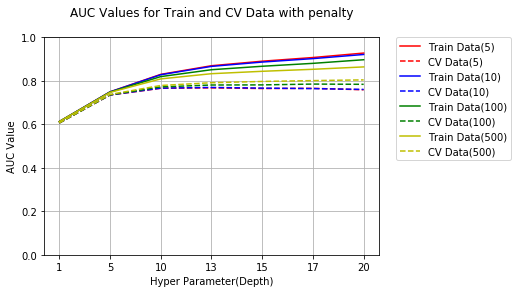

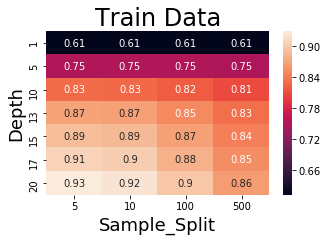

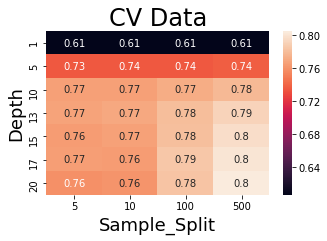

The optimal value of max_depth =  20  And Optimal min_samples_split is :  500
The AUC value for test data is  0.809564077704858


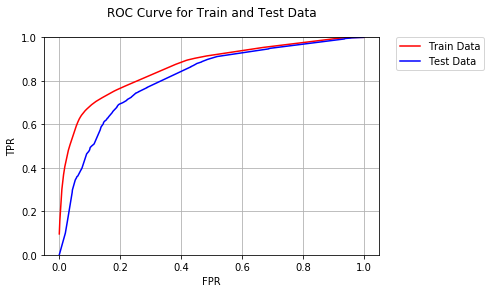

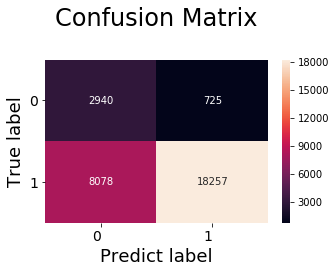

In [6]:
# Please write all the code with proper documentation
DT(train_bow, test_bow, cv_bow)

### [5.1.1] Top 20 important features from<font color='red'> SET 1</font>

In [7]:
# Please write all the code with proper documentation
dt = tree.DecisionTreeClassifier(class_weight= 'balanced',max_depth=20, min_samples_split=500)
dt.fit(train_bow,Y_train)
feat_log = dt.feature_importances_

count_vect = CountVectorizer()
p = count_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = count_vect.get_feature_names()

q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 20  important features of positive class", np.array(q['feature'][:20]))
print("Top 20  important features of negative class",np.array(q.tail(20)['feature']))

Top 20  important features of positive class ['not' 'great' 'best' 'delicious' 'good' 'love' 'perfect' 'favorite'
 'loves' 'disappointed' 'wonderful' 'bad' 'nice' 'thought' 'excellent'
 'highly' 'terrible' 'tasty' 'easy' 'awful']
Top 20  important features of negative class ['flitter' 'fling' 'flipped' 'flinging' 'flings' 'flint' 'flintstone'
 'flintstones' 'flinty' 'flip' 'flippin' 'flirted' 'flipping' 'flips'
 'flipside' 'flipz' 'flirtation' 'flirtations' 'flirtatiously'
 'zzzzzzzzzz']


### [5.1.2] Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

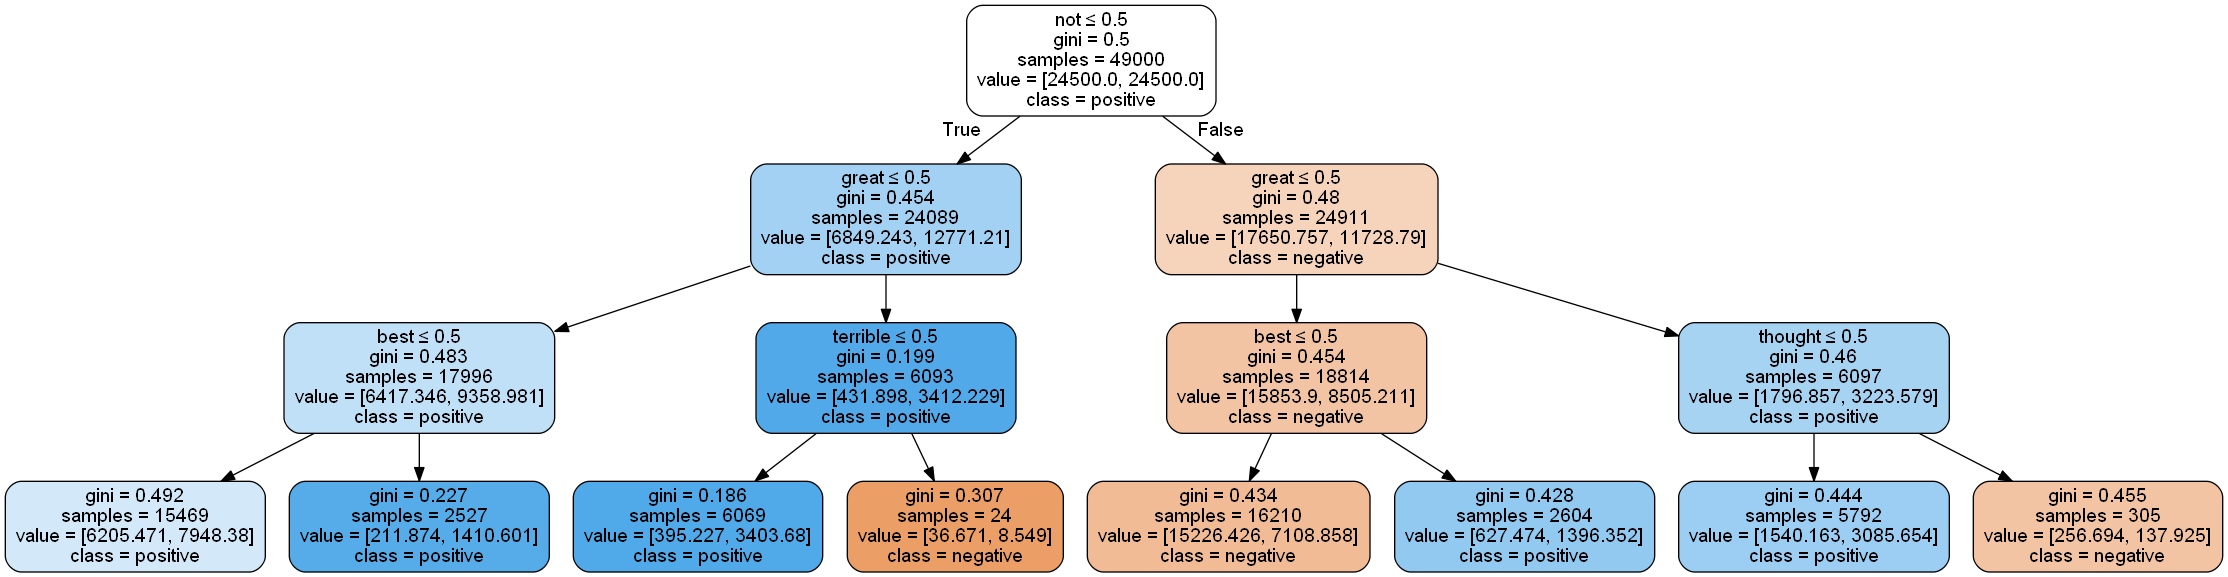

In [79]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

count_vect = CountVectorizer()
count_vect.fit_transform(X_train)
names=count_vect.get_feature_names()

dt = tree.DecisionTreeClassifier(class_weight= 'balanced',max_depth=3, min_samples_split=500)
dt.fit(train_bow,Y_train)
# https://github.com/scikit-learn/scikit-learn/issues/9952
dot_data = StringIO()  
tree.export_graphviz(dt, out_file=dot_data,feature_names=names, 
                     class_names=['negative','positive'],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())

## [5.2] Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  2.7min finished


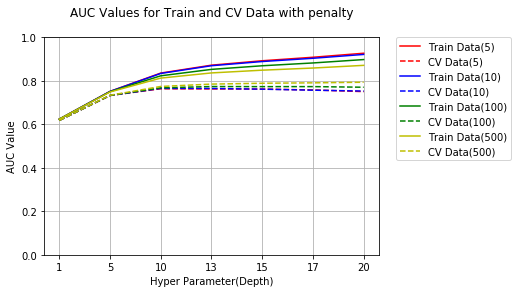

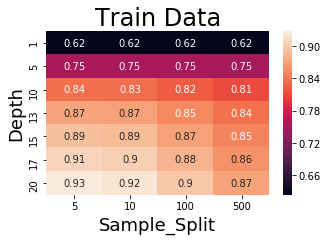

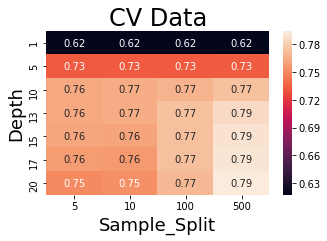

The optimal value of max_depth =  20  And Optimal min_samples_split is :  500
The AUC value for test data is  0.8082324369785773


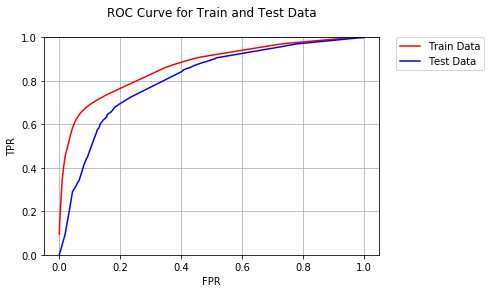

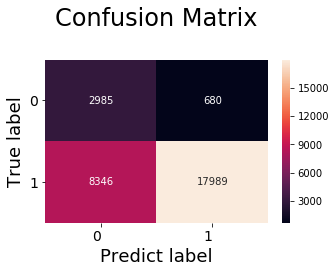

In [8]:
# Please write all the code with proper documentation
DT(train_tfidf, test_tfidf, cv_tfidf)

### [5.2.1] Top 20 important features from<font color='red'> SET 2</font>

In [4]:
# Please write all the code with proper documentation
dt = tree.DecisionTreeClassifier(class_weight= 'balanced',max_depth=20, min_samples_split=500)
dt.fit(train_tfidf,Y_train)
feat_log = dt.feature_importances_

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
p = tf_idf_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['+ve'])
p['feature'] = tf_idf_vect.get_feature_names()
q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 20  important features of positive class", np.array(q['feature'][:20]))
print("Top 20  important features of negative class",np.array(q.tail(20)['feature']))

Top 20  important features of positive class ['not' 'great' 'best' 'delicious' 'love' 'good' 'disappointed' 'loves'
 'favorite' 'bad' 'wonderful' 'perfect' 'nice' 'excellent' 'thought'
 'highly' 'tasty' 'easy' 'terrible' 'find']
Top 20  important features of negative class ['friends' 'friendly' 'friend tried' 'friend told' 'friend recommended'
 'friend not' 'friend mine' 'friend loved' 'fridge not'
 'friend introduced' 'friend house' 'friend got' 'friend gave'
 'friend found' 'friend brought' 'friend' 'fried rice' 'fried chicken'
 'fried' 'zuke']


### [5.2.2] Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

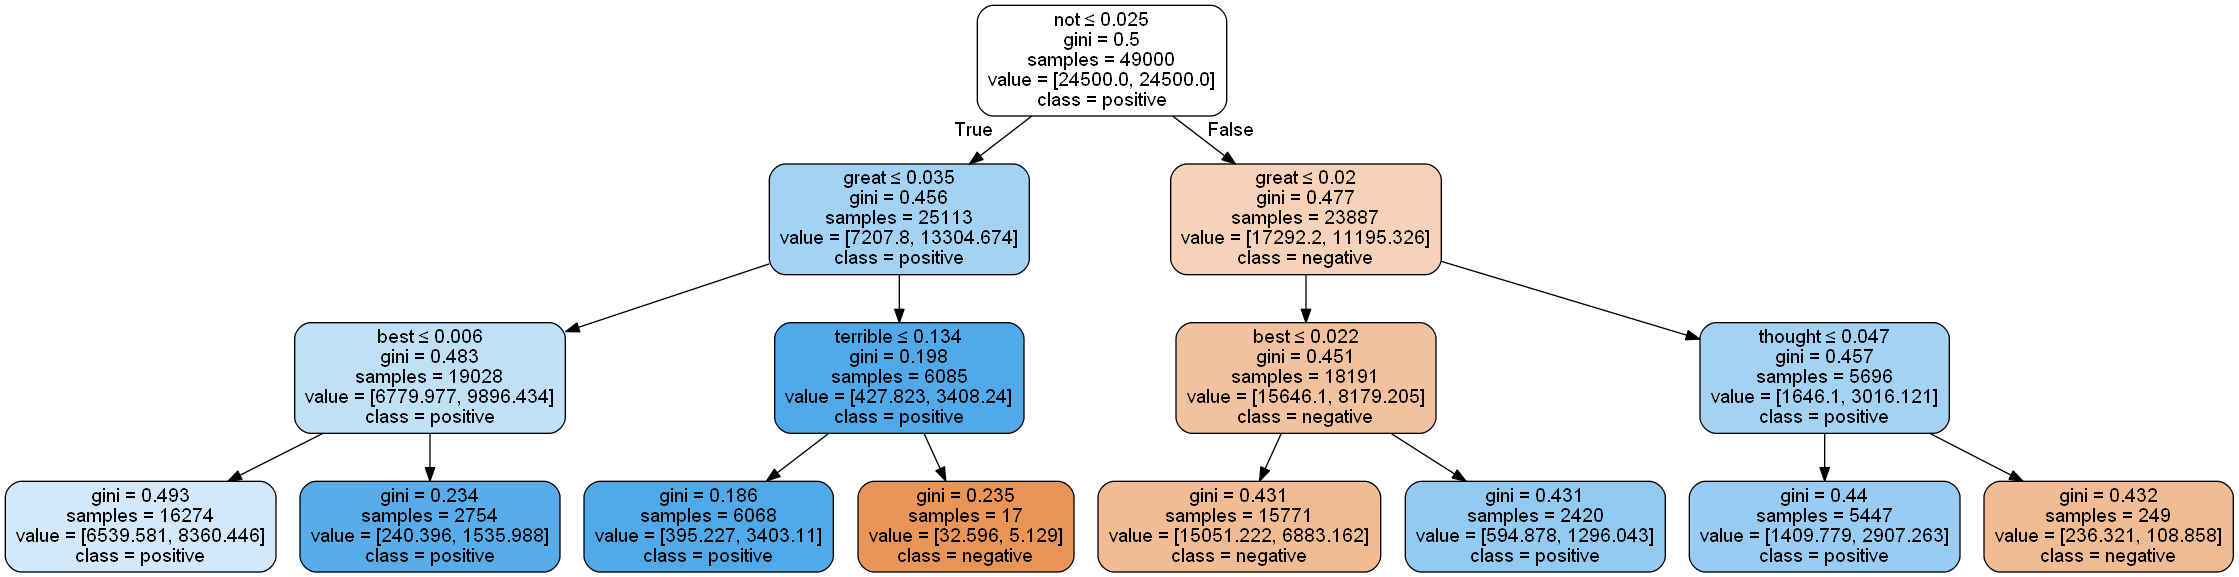

In [80]:

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit_transform(X_train)
names=tf_idf_vect.get_feature_names()

dt = tree.DecisionTreeClassifier(class_weight= 'balanced',max_depth=3, min_samples_split=500)
dt.fit(train_tfidf,Y_train)
# https://github.com/scikit-learn/scikit-learn/issues/9952
dot_data = StringIO()  
tree.export_graphviz(dt, out_file=dot_data,feature_names=names, 
                     class_names=['negative','positive'],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())

## [5.3] Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  2.5min finished


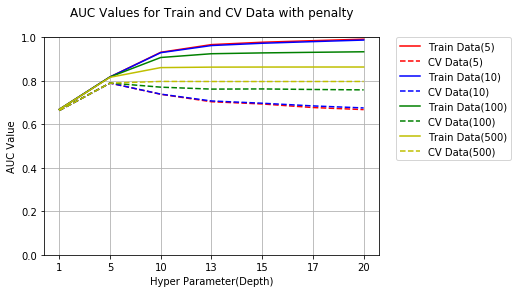

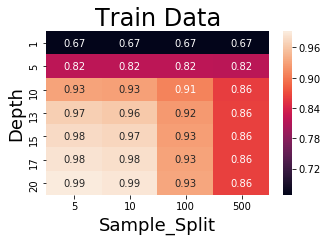

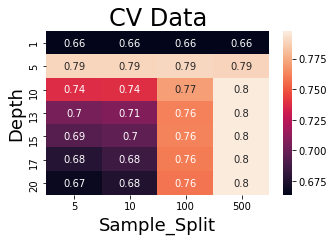

The optimal value of max_depth =  10  And Optimal min_samples_split is :  500
The AUC value for test data is  0.8084590532676494


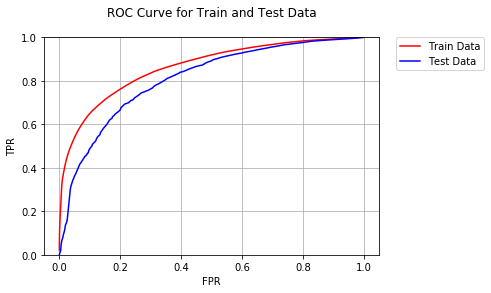

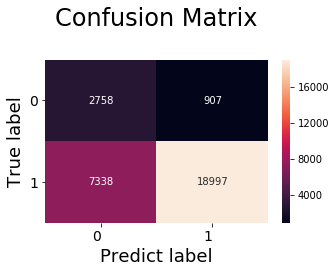

In [9]:
# Please write all the code with proper documentation
DT(train_avgw2v, test_avgw2v, cv_avgw2v)

## [5.4] Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  2.5min finished


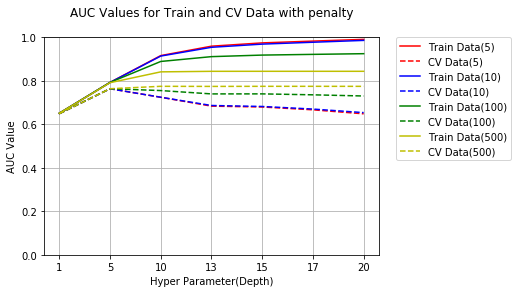

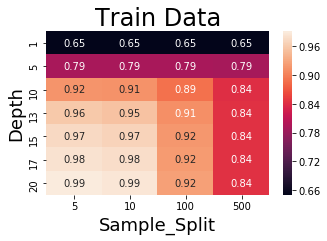

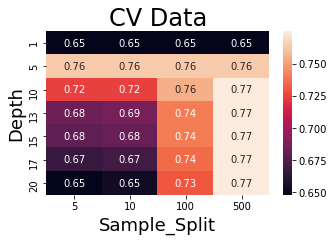

The optimal value of max_depth =  10  And Optimal min_samples_split is :  500
The AUC value for test data is  0.7865442557083397


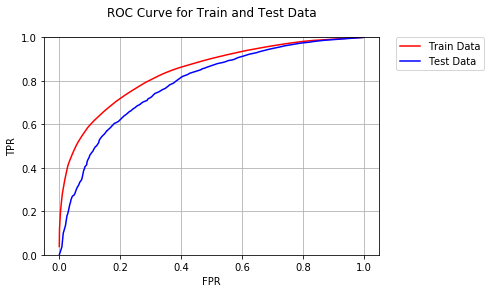

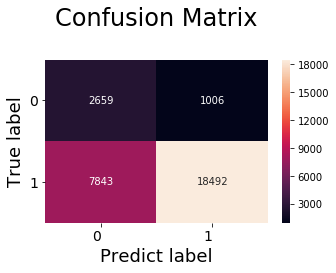

In [10]:
# Please write all the code with proper documentation
DT(train_tfw2v, test_tfw2v, cv_tfw2v)

# [6] Conclusions

In [6]:
# Please compare all your models using Prettytable library
from prettytable import from_csv
with open("table.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

+------------+-----------+--------------+------+
| Vectorizer | max_depth | sample_split | AUC  |
+------------+-----------+--------------+------+
|    BOW     |     20    |     500      | 0.81 |
|   TFIDF    |     20    |     500      | 0.8  |
|  AVG W2V   |     10    |     500      | 0.81 |
| TFIDF W2V  |     10    |     500      | 0.79 |
+------------+-----------+--------------+------+


1. Decision Tree is faster with avgw2v and tfidf w2v featurization.
2. BOW and Avg W2v featurisation gave 81% AUC value.
3. We can further improve the model by taking more data points, and by taking some other features that may provide us with better insight about the data.
4. And the previous model we have applied have given better results than this.